In [1]:
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd
from astropy.time import Time
from astropy.visualization import time_support, astropy_mpl_style, quantity_support
plt.style.use(astropy_mpl_style)
quantity_support()
time_support()  

<astropy.visualization.time.time_support.<locals>.MplTimeConverter at 0x7fac89bc9b10>

In [2]:
start_time='2020-02-07T20_00'
star='sirius'

In [3]:
data= np.load(f'plots/FoV_preliminary_south_20min_{start_time}.npy', 
              allow_pickle=True, encoding='latin1', fix_imports=True).flat[0]

In [4]:
stars = list(data.keys())
#sites = list(data[events[0]].keys())

for i, name in enumerate(stars):
    print(i,name)


0 mirfak
1 errai
2 sirius
3 alpha cmi
4 pollux
5 epsilon umi
6 kochab
7 elnath
8 betelgeuse
9 capella
10 bellatrix
11 rigel
12 menkar
13 regulus
14 alpha cas
15 mirach
16 hamal
17 gamma eri
18 alpha and
19 beta per
20 omicron uma
21 epsilon leo
22 sao 6487
23 sao 168460
24 polaris
25 sao 136871
26 dubhe
27 merak
28 52 uma
29 54 uma
30 rho pup
31 delta umi
32 alpha cet
33 35 hya
34 gamma uma
35 alula borealis
36 30 boo
37 theta leo
38 gamma boo
39 mizar
40 alpha com
41 70 vir
42 79 vir
43 vega
44 alpha oph
45 marfik
46 eta oph
47 antares
48 delta her
49 gamma dra
50 eta dra
51 alpha dra
52 alpha crb
53 alpha ser
54 delta scorpio
55 deneb
56 17 aql
57 canopus
58 alpha eri
59 alpha psa
60 acrux
61 beta car
62 aspidiske
63 beta cet
64 alpha phe
65 theta1 eri
66 pleiades
67 beta phe
68 beta lep
69 delta cma
70 spica
71 gamma1 leo
72 gamma crv
73 beta tau
74 beta leo
75 alpha lyn
76 lmc


In [5]:
len(data['errai'].keys())

1

In [6]:
divergence=[0.0022,0.0043,0.008,0.01135,0.01453]


In [7]:
for name in stars:
    
    if len(data[name].keys())>1:
        print(name)
        for div in divergence:
            for i in range(len(data[name][div]['obstime'])):
                data[name][div]['obstime']=Time(data[name][div]['obstime'], scale='utc', format ='isot')

sirius
alpha cmi
pollux
elnath
betelgeuse
bellatrix
rigel
menkar
regulus
mirach
hamal
gamma eri
alpha and
beta per
epsilon leo
sao 168460
sao 136871
54 uma
rho pup
alpha cet
35 hya
alula borealis
30 boo
theta leo
gamma boo
alpha com
70 vir
79 vir
vega
alpha oph
marfik
eta oph
antares
delta her
alpha crb
alpha ser
delta scorpio
17 aql
canopus
alpha eri
alpha psa
acrux
beta car
aspidiske
beta cet
alpha phe
theta1 eri
pleiades
beta phe
beta lep
delta cma
spica
gamma1 leo
gamma crv
beta tau
beta leo
alpha lyn
lmc


In [8]:
for name in stars:
    
        if name==star:
            if len(data[name].keys())>1:
                for i in range(len(data[name][divergence[0]]['hFoV_track'])):
                    print(data[name][divergence[0]]['obstime'][i])
                    print(data[name][divergence[0]]['alt'][i])
            else:
                print('the selected star is not visible from the site')
                print('\nPlease select another source')

2020-02-07T22:00:00.000
29.722540853138874
2020-02-07T22:20:00.000
34.262672200366985
2020-02-07T22:40:00.000
38.81335104287349
2020-02-07T23:00:00.000
43.36985565044051
2020-02-07T23:20:00.000
47.92672527450819
2020-02-07T23:40:00.000
52.47710595189622
2020-02-08T00:00:00.000
57.0116096876582
2020-02-08T00:20:00.000
61.516156164944604
2020-02-08T00:40:00.000
65.96752586818442
2020-02-08T01:00:00.000
70.3232766989798


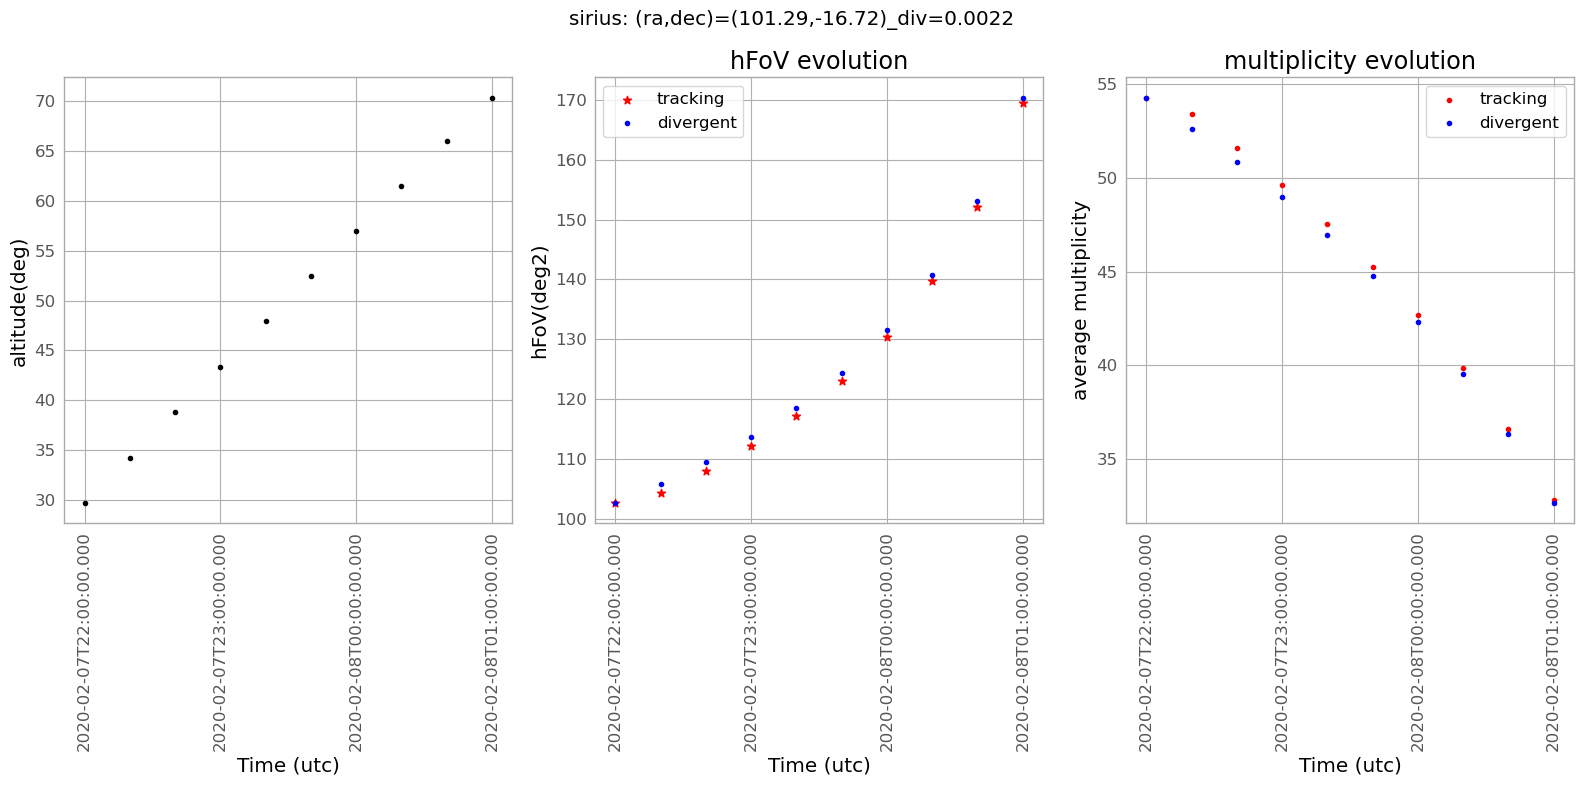

In [9]:
for name in stars:
    
    if name==star:
        div = divergence[0]
        fig,ax=plt.subplots(figsize=(16,8),nrows=1,ncols=3)
        fig.suptitle(f"{name}: (ra,dec)=({round(data[name]['ra_dec'][0],2)},{round(data[name]['ra_dec'][1],2)})_div={div}")

        for i in range(len(data[name][divergence[0]]['hFoV_track'])):
            
            #time=Time(data[name][div]['obstime'][i],scale='utc',format='isot')
            
            #if data[name][divergence[0]]['obstime'][i]>=Time('2020-02-08T00:00',scale='utc', format='isot'):
                #print(data[name][divergence[0]]['obstime'][i])
                ax[0].scatter(data[name][divergence[0]]['obstime'][i],data[name][divergence[0]]['alt'][i],marker='.',color='black')
                ax[0].set_ylabel('altitude(deg)')
                ax[0].xaxis.set_tick_params(rotation=90)
                
                
                ax[1].scatter(data[name][divergence[0]]['obstime'][i],data[name][divergence[0]]['hFoV_track'][i],marker='*',color='r',label='traking_hFoV')
                ax[1].scatter(data[name][divergence[0]]['obstime'][i],data[name][divergence[0]]['hFoV_div'][i],marker='.',color='blue',label='div_hFoV')
                ax[1].set_title('hFoV evolution')
                ax[1].set_ylabel('hFoV(deg2)')
                ax[1].xaxis.set_tick_params(rotation=90)
                ax[1].legend(['tracking','divergent'])
                
                ax[2].scatter(data[name][divergence[0]]['obstime'][i],data[name][divergence[0]]['m_ave_track'][i],marker='.',color='r',label='traking_hFoV')
                ax[2].scatter(data[name][divergence[0]]['obstime'][i],data[name][divergence[0]]['m_ave_div'][i],marker='.',color='blue',label='div_hFoV')
                ax[2].set_title('multiplicity evolution')
                ax[2].set_ylabel('average multiplicity')
                ax[2].xaxis.set_tick_params(rotation=90)
                ax[2].legend(['tracking','divergent'])
        #ax[2].set_xticks(data[name][divergence[0]]['obstime'])
        #ax[2].set_xticklabels(data[name][divergence[0]]['obstime'], rotation = 45)
        fig.tight_layout()

        
plt.show();

In [10]:
data[star][div]['alt'][1]

34.262672200366985

In [11]:
div=divergence[0]

/home/irene/miniconda3/envs/divergent/lib/python3.10/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


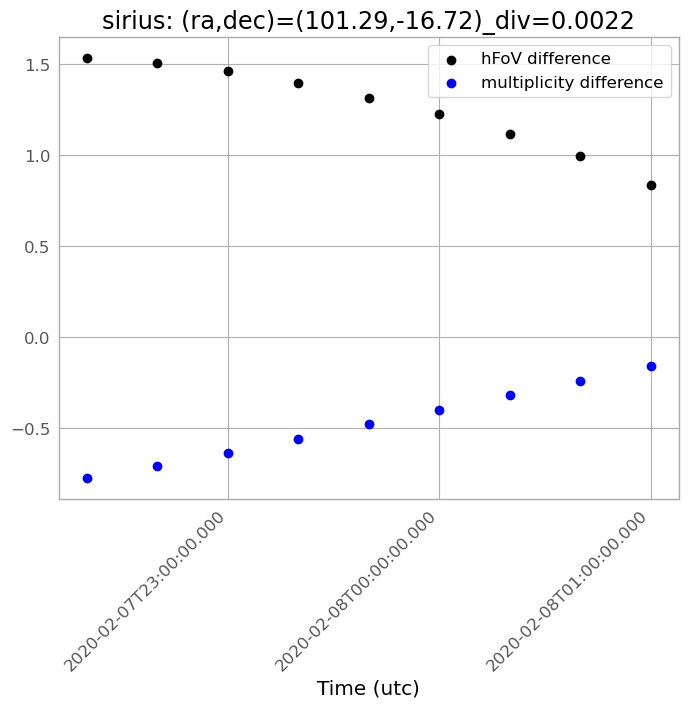

In [12]:
#star='pollux'
for i in range(1,len(data[star][div]['hFoV_track'])):            
    #if data[star][divergence[0]]['obstime'][i]>=Time('2020-02-08T04:00',scale='utc', format='isot'):
    plt.scatter(data[star][div]['obstime'][i],data[star][div]['hfov_diff'][i],color='black')
    plt.scatter(data[star][div]['obstime'][i], data[star][div]['m_ave_diff'][i],color='blue')
    plt.xticks(rotation=45, ha='right')
    plt.title(f"{star}: (ra,dec)=({round(data[star]['ra_dec'][0],2)},{round(data[star]['ra_dec'][1],2)})_div={div}")
    plt.legend(['hFoV difference','multiplicity difference'])

In [13]:
for div in divergence:
    data[star][div]['hfov_diff']=np.asarray(data[star][div]['hfov_diff'])
data[star][divergence[0]]['hfov_diff']

array([0.        , 1.53467211, 1.50891308, 1.46217907, 1.39839015,
       1.31748549, 1.22446745, 1.11857784, 0.99615559, 0.83427518])

In [14]:
for div in divergence:
    data[star][div]['m_ave_diff']=np.asarray(data[star][div]['m_ave_diff'])
np.max(np.abs(data[star][div]['hfov_diff']))

29.806149436529722

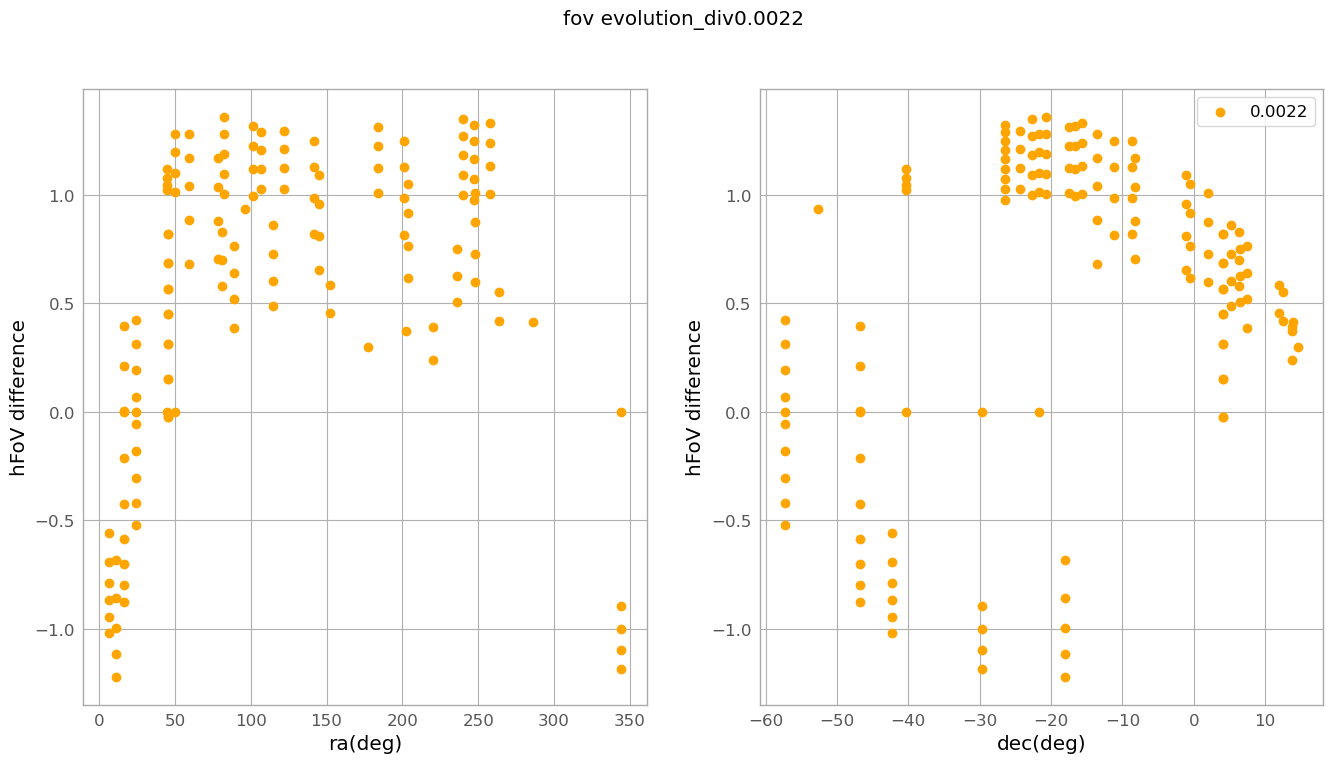

In [15]:
color=['red', 'green','orange','blue','violet']
fig,ax=plt.subplots(figsize=(16,8),nrows=1,ncols=2)
fig.suptitle(f"fov evolution_div{divergence[0]}")

for name in stars:
    #for j,div in enumerate(divergence):
    if len(data[name].keys())>1:
        div=divergence[0]
        for i in range(len(data[name][div]['alt'])):
            
            if data[name][div]['alt'][i]>50 and data[name][div]['alt'][i]< 70 :
                try:
                    ax[0].scatter(data[name]['ra_dec'][0],data[name][div]['hfov_diff'][i],color=color[2])
                    ax[1].scatter(data[name]['ra_dec'][1],data[name][div]['hfov_diff'][i],color=color[2])
                except ValueError:  #raised if `y` is empty.
                    pass

                ax[0].set_ylabel('hFoV difference')
                ax[0].set_xlabel('ra(deg)')
                #ax[0].set_ylim(-1,25)

                ax[1].set_ylabel('hFoV difference')
                ax[1].set_xlabel('dec(deg)')
                #ax[1].set_ylim(-1,25)

                plt.legend([div])

In [16]:
diff=[]
div=divergence[0]
for i,name in enumerate(stars):
    #if name != 'sao 136871':
        if len(data[name].keys())>1:
            diff.append(np.abs(data[name][div]['hfov_diff'][1]))
            #print(name,diff[i])

diff=np.asarray(diff)
diff

array([1.53467211, 1.34413305, 0.76736827, 0.79718313, 1.28017902,
       1.35601289, 1.54351982, 1.07756539, 1.24691364, 0.21859254,
       0.64005337, 1.44738039, 0.17183439, 0.01908454, 0.92545052,
       1.28382681, 1.55302101, 0.6051433 , 1.48771468, 1.07756539,
       1.48089538, 0.6051433 , 1.15032855, 1.13894334, 0.31947702,
       1.09295994, 1.19802341, 1.46744946, 0.3379552 , 1.22774993,
       1.42753085, 1.53582912, 1.47562829, 0.90179129, 0.84416845,
       1.33628457, 1.50176988, 1.20641289, 1.12425672, 0.42354744,
       0.89635077, 0.88206277, 0.67764085, 0.98238909, 0.40159028,
       0.01613325, 1.11997291, 0.92280681, 0.39694747, 1.5157341 ,
       1.47490537, 1.55365002, 0.99455265, 1.5304525 , 0.79718313,
       1.16469354, 0.60463351, 0.6742795 ])

In [53]:
for i in range(len(diff)):
    if diff[i]==np.min(diff):
        print (i, stars[i])

45 marfik


In [27]:
np.min(diff)

0.01613325145783051

In [55]:
import matplotlib.cm as cm
size=1e2*(diff)
               
color=cm.cool((diff)/np.max((diff)))
#size  = 100*np.log10(diff)
#color = cm.cool(np.log10(diff)/np.max(np.log10(diff)))
color[0]

array([0.98823529, 0.01176471, 1.        , 1.        ])

In [56]:
len(color)

58

In [57]:
#from colorspacious import cspace_converter
cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list


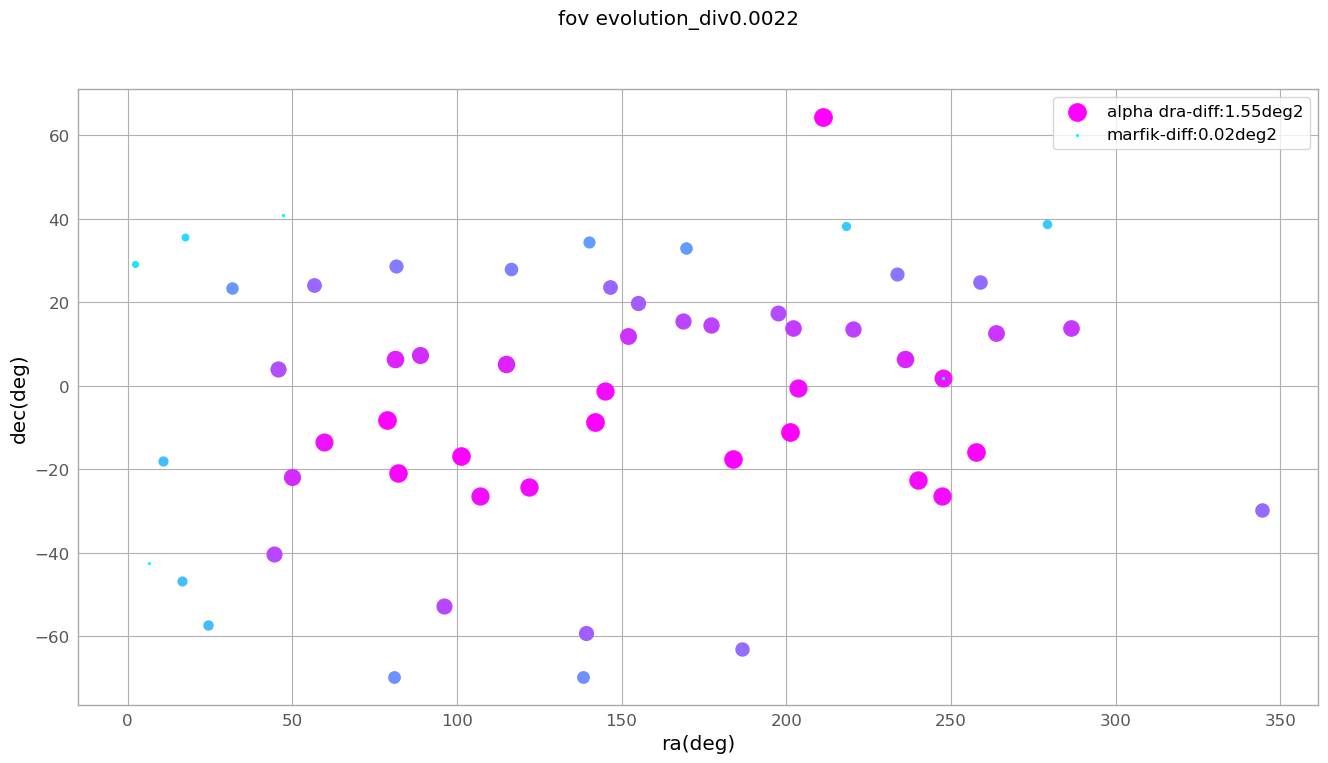

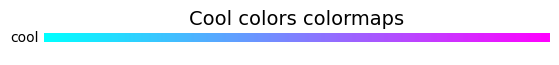

In [59]:
fig,ax=plt.subplots(figsize=(16,8))
fig.suptitle(f"fov evolution_div{div}")
j=-1   # necessario per corregerte per le stelle non visibili
for i,name in enumerate(stars):
    if len(data[name].keys())>1:
            j=j+1
            
            ax.scatter(data[name]['ra_dec'][0],data[name]['ra_dec'][1],color=color[j],s=size[j])
            
            ax.set_ylabel('dec(deg)')
            ax.set_xlabel('ra(deg)')
    #plt.annotate(name,(data[name]['ra_dec'][0]+0.01,data[name]['ra_dec'][1]+0.01))
#ax.scatter(data['acrux']['ra_dec'][0],data['acrux']['ra_dec'][1],marker='*', color='black',label='acrux')
ax.scatter(data[stars[51]]['ra_dec'][0],data[stars[51]]['ra_dec'][1],color=color[51],s=size[51],label=f'{stars[51]}-diff:{np.round(diff[51],2)}deg2')
ax.scatter(data[stars[45]]['ra_dec'][0],data[stars[45]]['ra_dec'][1],color=color[45],s=size[45],label=f'{stars[45]}-diff:{np.round(diff[45],2)}deg2')
plt.legend()
plot_color_gradients('Cool colors',['cool'])

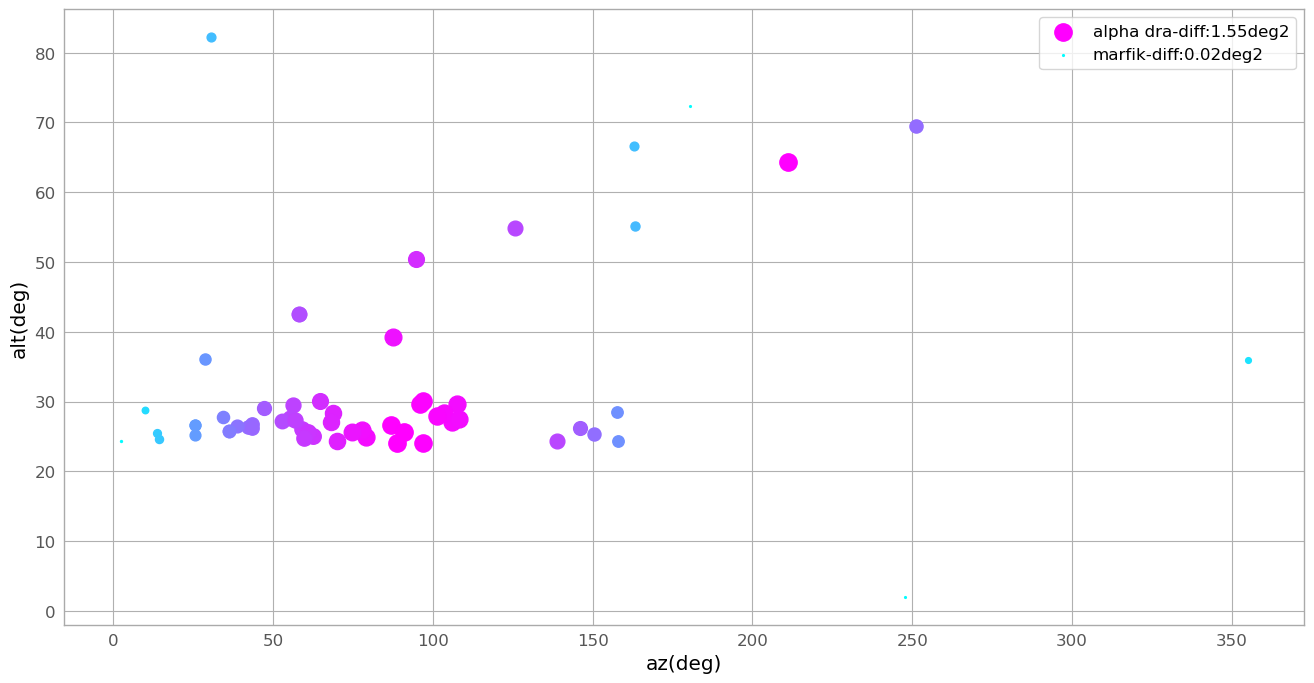

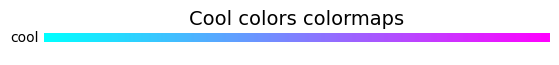

In [61]:
fig,ax=plt.subplots(figsize=(16,8))
#fig.suptitle(f"fov evolution_div{div}")
j=-1
for i,name in enumerate(stars):
    if len(data[name].keys())>1:
        j+=1
        
        ax.scatter(data[name][div]['az'][0],data[name][div]['alt'][0],color=color[j],s=size[j])

        ax.set_ylabel('alt(deg)')
        ax.set_xlabel('az(deg)')
        #plt.annotate(name,(data[name][div]['az'][0]+0.01,data[name][div]['alt'][0]+0.01))
        #ax.set_xlim(0,150)
        #ax.set_ylim(24,40)
#ax.scatter(data['marfik'][div]['az'][0],data['marfik'][div]['alt'][0], color=color[46],s=size[46],label='marfik:max diff')
#plt.annotate('marfik',(data['marfik'][div]['az'][1],data['marfik'][div]['alt'][1]))
ax.scatter(data[stars[51]]['ra_dec'][0],data[stars[51]]['ra_dec'][1],color=color[51],s=size[51],label=f'{stars[51]}-diff:{np.round(diff[51],2)}deg2')
ax.scatter(data[stars[45]]['ra_dec'][0],data[stars[45]]['ra_dec'][1],color=color[45],s=size[45],label=f'{stars[45]}-diff:{np.round(diff[45],2)}deg2')
plt.legend()
plot_color_gradients('Cool colors',['cool'])


In [23]:
for name in stars:
    if len(data[name].keys())>1:
        #for j,div in enumerate(divergence):
        div=divergence[0]
        data[name][div]['fov_z20']=[]
        data[name][div]['fov_z40']=[]
        data[name][div]['fov_z60']=[]
        for i in range(len(data[name][div]['alt'])):
            if data[name][div]['alt'][i]>70:
                 data[name][div]['fov_z20'].append(data[name][div]['hfov_diff'][i])
            elif data[name][div]['alt'][i]>50 and data[name][div]['alt'][i]<70:
                data[name][div]['fov_z40'].append(data[name][div]['hfov_diff'][i])
            elif data[name][div]['alt'][i]<50: 
                data[name][div]['fov_z60'].append(data[name][div]['hfov_diff'][i])


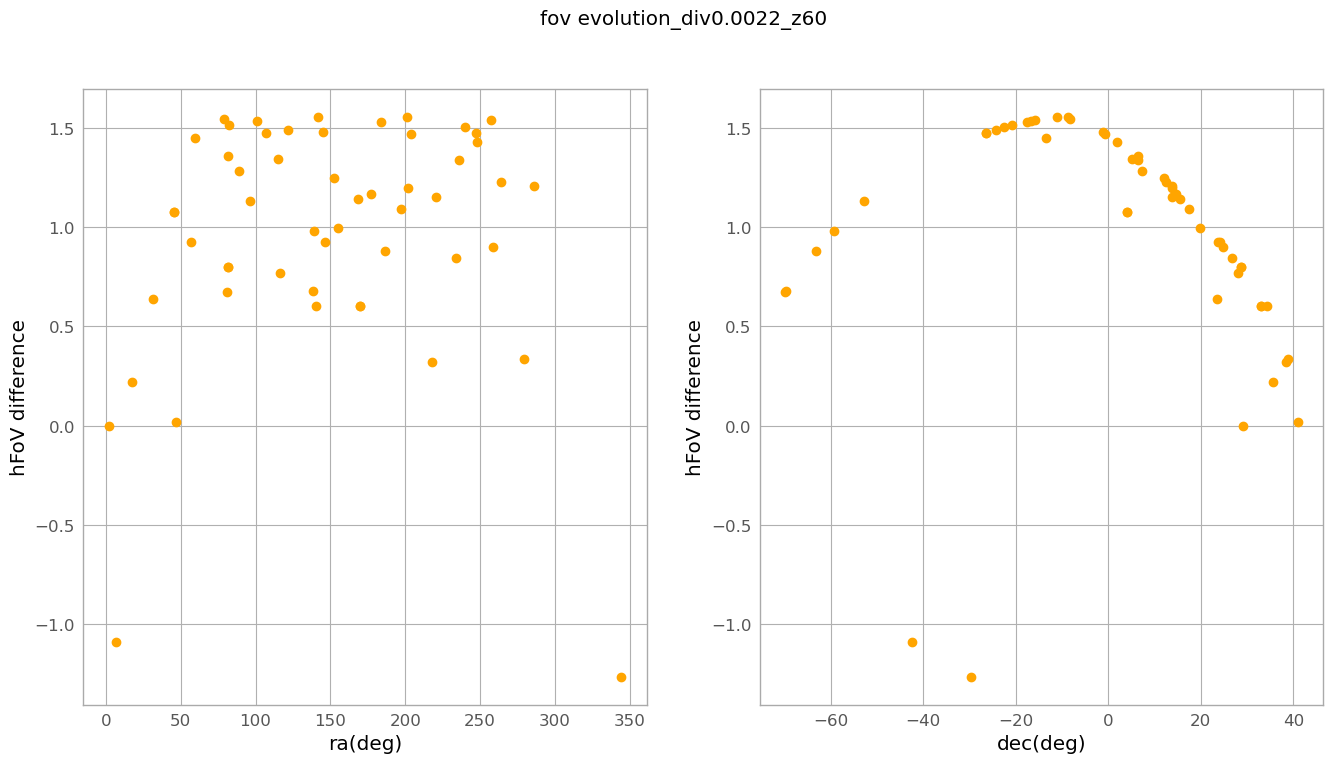

In [24]:
color=['red', 'green','orange','blue','violet']
fig,ax=plt.subplots(figsize=(16,8),nrows=1,ncols=2)
fig.suptitle(f"fov evolution_div{divergence[0]}_z60")

for name in stars:
    if len(data[name].keys())>1:
        div=divergence[0]
        if len(data[name][div]['fov_z60'])>0:
            ax[0].scatter(data[name]['ra_dec'][0],np.max(data[name][div]['fov_z60']),color=color[2])
            ax[1].scatter(data[name]['ra_dec'][1],np.max((data[name][div]['fov_z60'])),color=color[2])



        ax[0].set_ylabel('hFoV difference')
        ax[0].set_xlabel('ra(deg)')
        #ax[0].set_ylim(-0.05,3.5)

        ax[1].set_ylabel('hFoV difference')
        ax[1].set_xlabel('dec(deg)')
        #ax[1].set_ylim(-1,3.5)
        #ax[1].annotate(name, (data[name]['ra_dec'][1],np.max(np.abs(data[name][div]['hfov_diff']))))

    #plt.legend([div])

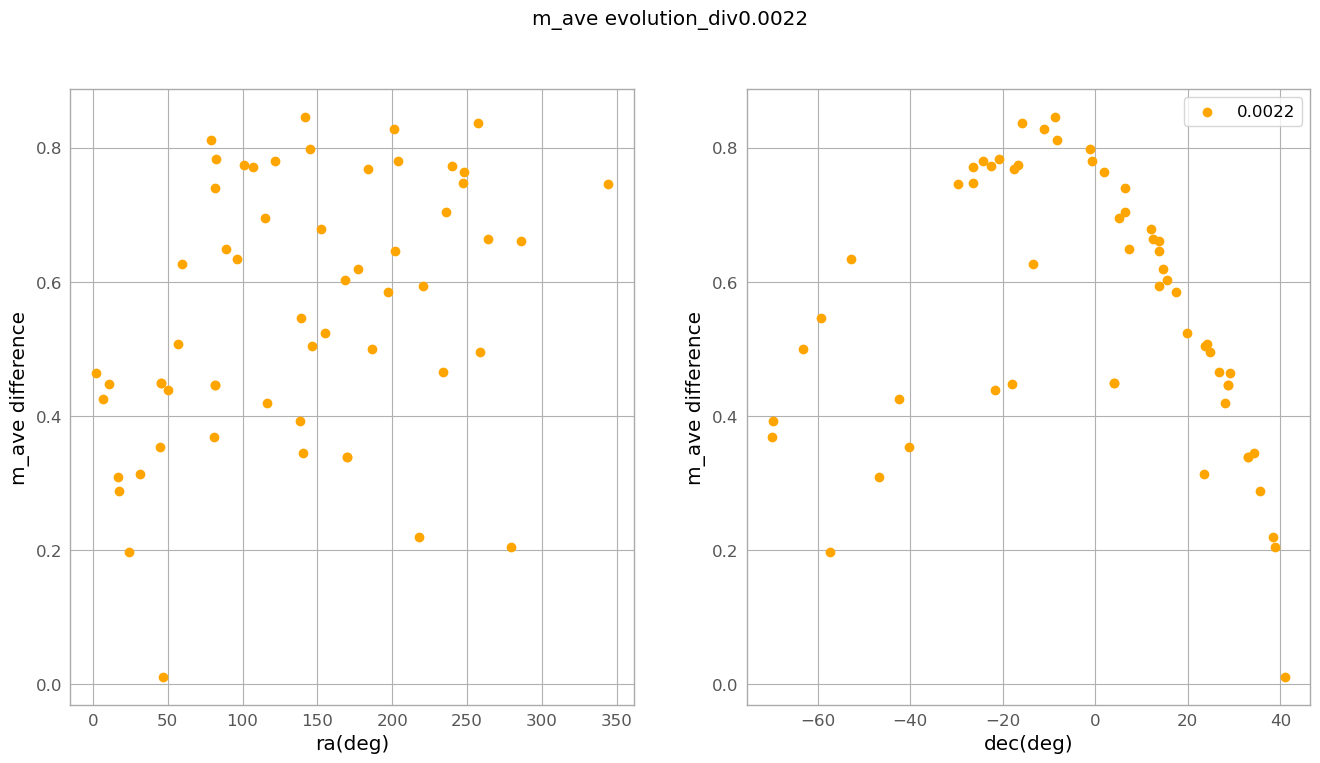

In [25]:
color=['red', 'green','orange','blue','violet']
fig,ax=plt.subplots(figsize=(16,8),nrows=1,ncols=2)
fig.suptitle(f"m_ave evolution_div{divergence[0]}")

for name in stars:
    if len(data[name].keys())>1:
        
        div=divergence[0]
        try:
            ax[0].scatter(data[name]['ra_dec'][0],np.max(np.abs(data[name][div]['m_ave_diff'])),color=color[2])
            ax[1].scatter(data[name]['ra_dec'][1],np.max(np.abs(data[name][div]['m_ave_diff'])),color=color[2])
        except ValueError:  #raised if `y` is empty.
            pass

        ax[0].set_ylabel('m_ave difference')
        ax[0].set_xlabel('ra(deg)')
        #ax[0].set_ylim(-1,25)

        ax[1].set_ylabel('m_ave difference')
        ax[1].set_xlabel('dec(deg)')
        #ax[1].set_ylim(-1,25)

    plt.legend([div])

In [26]:
for name in stars:
    #for j,div in enumerate(divergence):
    div=divergence[0]
    try:
        plt.scatter(np.max(data[name][div]['alt']),np.max(np.abs(data[name][div]['hfov_diff'])))
        plt.xlabel('max alt(deg)')
        plt.ylabel('max hFoV differnece')
        
    except ValueError:  #raised if `y` is empty.
        pass
    

KeyError: 0.0022

In [ ]:
color=['red', 'green','orange','blue','violet']
fig,ax=plt.subplots(figsize=(16,8),nrows=1,ncols=2)
fig.suptitle(f"fov evolution_div{divergence[0]}")

for name in stars:
    if len(data[name].keys())>1:
        
        div=divergence[0]
        for i in range(len(data[name][div]['obstime'])):
        #for j,div in enumerate(divergence):

            if data[name][div]['obstime'][i]==Time('2020-02-07T20:30',scale='utc', format='isot'):

                ax[0].scatter(data[name]['ra_dec'][0],data[name][div]['hfov_diff'][i],color=color[2])
                ax[1].scatter(data[name]['ra_dec'][1],data[name][div]['hfov_diff'][i],color=color[2])

        ax[0].set_ylabel('hFoV difference')
        ax[0].set_xlabel('ra(deg)')
        #ax[0].set_ylim(-1,25)

        ax[1].set_ylabel('hFoV difference')
        ax[1].set_xlabel('dec(deg)')
        #ax[1].set_ylim(-1,25)

    plt.legend([div])

In [ ]:
color=['red', 'green','orange','blue','violet']
fig,ax=plt.subplots(figsize=(16,8),nrows=1,ncols=2)
fig.suptitle(f"fov evolution_div{divergence[4]}_30min")

for name in stars:
    if len(data[name].keys())>1:
       
        div=divergence[4]
        for i in range(len(data[name][div]['obstime'])):
        #for j,div in enumerate(divergence):

            if data[name][div]['obstime'][i]==Time('2020-02-07T20:30',scale='utc', format='isot'):

                ax[0].scatter(data[name]['ra_dec'][0],data[name][div]['hFoV_track'][i]-data[name][div]['hFoV_track'][0],color='violet')
                ax[1].scatter(data[name]['ra_dec'][1],data[name][div]['hFoV_track'][i]-data[name][div]['hFoV_track'][0],color='violet')

        ax[0].set_ylabel('hFoV difference')
        ax[0].set_xlabel('ra(deg)')
        #ax[0].set_ylim(-1,25)

        ax[1].set_ylabel('hFoV difference')
        ax[1].set_xlabel('dec(deg)')
        #ax[1].set_ylim(-1,25)
        #ax[0].legend()
        plt.legend([div])

In [ ]:
color=['red', 'green','orange','blue','violet']
fig,ax=plt.subplots(figsize=(16,8),nrows=1,ncols=2)
fig.suptitle(f"fov evolution_div{divergence[4]}_max")

for name in stars:
    div=divergence[4]
    
    #for j,div in enumerate(divergence):
    ax[0].scatter(data[name]['ra_dec'][0],np.max(data[name][div]['hFoV_track'])-data[name][div]['hFoV_track'][0],color='violet')
    ax[1].scatter(data[name]['ra_dec'][1],np.max(data[name][div]['hFoV_track'])-data[name][div]['hFoV_track'][0],color='violet')

    ax[0].set_ylabel('hFoV difference')
    ax[0].set_xlabel('ra(deg)')
    ax[0].set_ylim(-5,150)
    
    ax[1].set_ylabel('hFoV difference')
    ax[1].set_xlabel('dec(deg)')
    ax[1].set_ylim(-5,150)
    #plt.legend()
    plt.legend([div])

In [ ]:
plt.scatter(data[star][divergence[0]]['obstime'],data[star][divergence[0]]['az'])
plt.xticks(rotation=45, ha='right')

In [ ]:
data['vega']

In [ ]:
fig,ax=plt.subplots(figsize=(16,8),nrows=1,ncols=2)
for name in stars:
    div=0.0022
    if len(data[name].keys())>1:
        for i in range(len(data[name][div]['alt'])):
            if data[name][div]['alt'][i]<40 and data[name][div]['alt'][i]>30 :
                try:
                    ax[0].scatter(data[name]['ra_dec'][0],data[name][div]['hfov_diff'][i],color=color[2])
                    ax[1].scatter(data[name]['ra_dec'][1],np.abs(data[name][div]['hfov_diff'][i]),color=color[2])
                except ValueError:  #raised if `y` is empty.
                    pass
ax[0].set_ylabel('hFoV difference')
ax[0].set_xlabel('ra(deg)')
#ax[0].set_ylim(-0.05,3.5)

ax[1].set_ylabel('hFoV difference')
ax[1].set_xlabel('dec(deg)')
#ax[1].set_ylim(-1,3.5)
#ax[1].annotate(name, (data[name]['ra_dec'][1],np.max(np.abs(data[name][div]['hfov_diff']))))

#plt.legend([div])